In [1]:
import numpy as np
from scipy.integrate import trapezoid
from scipy.stats import expon
def psi_2p_z(x, y, z, a0=1.0):

    r = np.sqrt(x*x + y*y + z*z)
    cos_theta = z / r
    pref = 1.0 / (4.0 * np.sqrt(2.0*np.pi) * (a0**1.5))
    return pref * (r/a0) * cos_theta * np.exp(-r/(2.0*a0))

def overlap_integrand(x, y, z, R, a0=1.0):

    return psi_2p_z(x, y, z + 0.5*R, a0=a0) * psi_2p_z(x, y, z - 0.5*R, a0=a0)

def monte_carlo_overlap_uniform(R=2.0, L=20.0, N=10, a0=1.0
                                ):
    pts = np.random.uniform(-L, L, size=(N, 3))
    vals = overlap_integrand(pts[:,0], pts[:,1], pts[:,2], R, a0=a0)
    V = (2.0*L)**3
    mean = np.mean(vals)
    est = V * mean
    return est

def monte_carlo_overlap_importance_exp(R=2.0, N=100_000, a0=1.0):

    x = expon.rvs(size=N, scale=1)
    y = expon.rvs(size=N, scale=1)
    z = expon.rvs(size=N, scale=1)
    num = psi_2p_z(x, y, z + 0.5*R, a0) * psi_2p_z(x, y, z - 0.5*R, a0)
    g = expon.pdf(x) * expon.pdf(y) * expon.pdf(z)
    w = num / g
    est = np.mean(w)
    return est

In [11]:
import matplotlib.pyplot as plt

def plot_convergence_vs_N(R=2.0, L=20.0,
                          N_list=(10**2,10**3,10**4,10**5,10**6),
                          a0=1.0):
    uni = []
    imp = []
    for N in N_list:
        u_est= monte_carlo_overlap_uniform(R, L, N, a0)
        i_est = monte_carlo_overlap_importance_exp(R, N, a0)
        uni.append((N, u_est))
        imp.append((N, i_est))

    Ns = np.array([n for n,_ in uni], dtype=float)
    u_est = np.array([e for _,e in uni])
    i_est = np.array([e for _,e in imp])

    plt.figure()
    plt.plot(Ns, u_est, label='Uniform MC')
    plt.plot(Ns, i_est, label='Importance MC')
    plt.xscale('log')
    plt.xlabel('N (log scale)')
    plt.ylabel('S(R)')
    plt.title(f'Overlap S(R) vs N (R = {R} a0)')
    plt.legend()
    plt.tight_layout()
    plt.show()

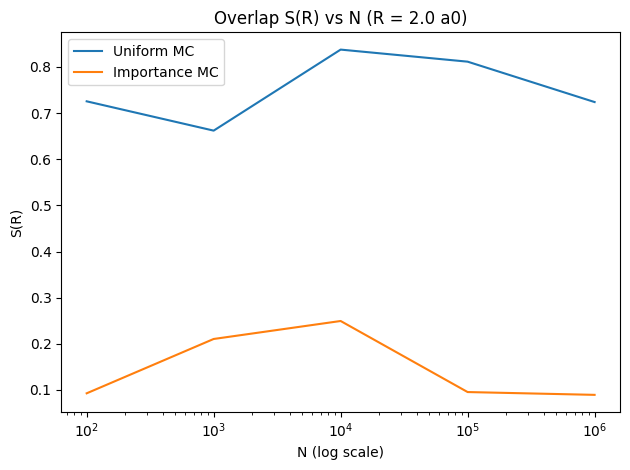

In [12]:
plot_convergence_vs_N()

In [16]:
def plot_S_vs_R(R_min=0.5, R_max=20.0, dR=0.5, N=200_000, sigma=2.0, a0=1):
	Rvals = np.arange(R_min, R_max + 1e-12, dR)
	E = []
	for R in Rvals:
	    est = monte_carlo_overlap_importance_exp(R=R, N=N, a0=a0)
	    E.append(est)
	E2 = []
	for R in Rvals:
	    est = monte_carlo_overlap_uniform(R=R,L=20,  N=N, a0=a0)
	    E2.append(est)

	plt.figure()
	plt.plot(Rvals, E, label='Importance Sampling')
	plt.plot(Rvals, E2, label='Uniform Sampling')
	plt.axhline(0.0, ls='--', lw=1)
	plt.xlabel('R (a0)')
	plt.ylabel('S(R)')
	plt.legend()
	plt.tight_layout()
	plt.show()

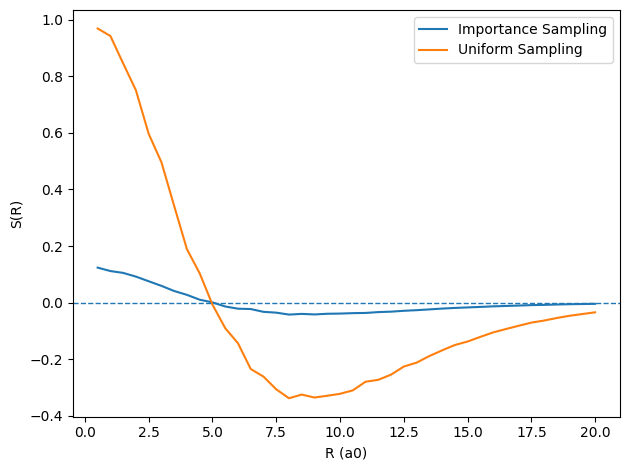

In [17]:
plot_S_vs_R(R_min=0.5, R_max=20.0, dR=0.5)